# Step 1: import Python libraries and dataset, perform EDA

In [1]:
from rake_nltk import Rake   # ensure this is installed

import nltk
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# df = pd.read_csv('https://query.data.world/s/uikepcpffyo2nhig52xxeevdialfl7')   # 250 rows × 38 columns
df = pd.read_csv('IMDB_Top250Engmovies2_OMDB_Detailed.csv')   # same data 250 rows × 38 columns
df.head(5)

,Unnamed: 0,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,...,tomatoConsensus,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,tomatoURL,DVD,BoxOffice,Production,Website,Response
0,1,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,"Crime, Drama",Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/shawshank_rede...,27 Jan 1998,NaN,Columbia Pictures,NaN,True
1,2,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay), Francis Ford Coppola ...","Marlon Brando, Al Pacino, James Caan, Richard ...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather/,09 Oct 2001,NaN,Paramount Pictures,http://www.thegodfather.com,True
2,3,The Godfather: Part II,1974,R,20 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay), Mario Puzo ...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/godfather_part...,24 May 2005,NaN,Paramount Pictures,http://www.thegodfather.com/,True
3,4,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/the_dark_knight/,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,http://thedarkknight.warnerbros.com/,True
4,5,12 Angry Men,1957,APPROVED,01 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,NaN,NaN,NaN,NaN,http://www.rottentomatoes.com/m/1000013-12_ang...,06 Mar 2001,NaN,Criterion Collection,http://www.criterion.com/films/27871-12-angry-men,True


In [3]:
# data overview
print('Rows x Columns : ', df.shape[0], 'x', df.shape[1])
print('Features: ', df.columns.tolist())
print('\nUnique values:')
print(df.nunique())
for col in df.columns:
    print(col, end=': ')
    print(df[col].unique())

Rows x Columns :  250 x 38
Features:  ['Unnamed: 0', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster', 'Ratings.Source', 'Ratings.Value', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'tomatoMeter', 'tomatoImage', 'tomatoRating', 'tomatoReviews', 'tomatoFresh', 'tomatoRotten', 'tomatoConsensus', 'tomatoUserMeter', 'tomatoUserRating', 'tomatoUserReviews', 'tomatoURL', 'DVD', 'BoxOffice', 'Production', 'Website', 'Response']

Unique values:
Unnamed: 0           250
Title                250
Year                  85
Rated                 10
Released             244
Runtime              103
Genre                110
Director             155
Writer               238
Actors               248
Plot                 250
Language              68
Country               39
Awards               235
Poster               250
Ratings.Source         1
Ratings.Value         13
Metascore             44
imdb

In [4]:
# type of entries, how many missing values/null fields
df.info()
print('\nMissing values:  ', df.isnull().sum().values.sum())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         250 non-null    int64  
 1   Title              250 non-null    object 
 2   Year               250 non-null    int64  
 3   Rated              250 non-null    object 
 4   Released           248 non-null    object 
 5   Runtime            250 non-null    object 
 6   Genre              250 non-null    object 
 7   Director           250 non-null    object 
 8   Writer             249 non-null    object 
 9   Actors             250 non-null    object 
 10  Plot               250 non-null    object 
 11  Language           250 non-null    object 
 12  Country            250 non-null    object 
 13  Awards             245 non-null    object 
 14  Poster             250 non-null    object 
 15  Ratings.Source     250 non-null    object 
 16  Ratings.Value      250 non

Unnamed: 0             0
Title                  0
Year                   0
Rated                  0
Released               2
Runtime                0
Genre                  0
Director               0
Writer                 1
Actors                 0
Plot                   0
Language               0
Country                0
Awards                 5
Poster                 0
Ratings.Source         0
Ratings.Value          0
Metascore             73
imdbRating             0
imdbVotes              0
imdbID                 0
Type                   0
tomatoMeter          250
tomatoImage          250
tomatoRating         250
tomatoReviews        250
tomatoFresh          250
tomatoRotten         250
tomatoConsensus      250
tomatoUserMeter      250
tomatoUserRating     250
tomatoUserReviews    250
tomatoURL              0
DVD                    3
BoxOffice            175
Production             0
Website              119
Response               0
dtype: int64

In [5]:
# summary statistics for all numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,250.0,125.500000,72.312977,1.0,63.25,125.5,187.750,250.0
Year,250.0,1982.676000,24.809212,1921.0,1961.25,1988.0,2003.000,2017.0
Metascore,177.0,80.045198,11.030340,53.0,72.00,81.0,89.000,100.0
imdbRating,250.0,8.244000,0.245735,8.0,8.10,8.2,8.375,9.3
tomatoMeter,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tomatoImage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tomatoRating,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tomatoReviews,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tomatoFresh,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tomatoRotten,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# keep only these 5 useful columns, 250 rows with no NaN field
df = df[['Title','Director','Actors','Plot','Genre']]
df.head(5)

,Title,Director,Actors,Plot,Genre
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,"Crime, Drama"
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"Crime, Drama"
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"Crime, Drama"
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"Action, Crime, Drama"
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,"Crime, Drama"


In [7]:
df.loc[(df.Genre == 'Drama')][:5]

,Title,Director,Actors,Plot,Genre
8,Fight Club,David Fincher,"Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier","An insomniac office worker, looking for a way ...",Drama
14,One Flew Over the Cuckoo's Nest,Milos Forman,"Michael Berryman, Peter Brocco, Dean R. Brooks...",A criminal pleads insanity after getting into ...,Drama
63,Requiem for a Dream,Darren Aronofsky,"Ellen Burstyn, Jared Leto, Jennifer Connelly, ...",The drug-induced utopias of four Coney Island ...,Drama
81,All About Eve,Joseph L. Mankiewicz,"Bette Davis, Anne Baxter, George Sanders, Cele...",An ingenue insinuates herself into the company...,Drama
85,Good Will Hunting,Gus Van Sant,"Matt Damon, Ben Affleck, Stellan Skarsgård, Jo...","Will Hunting, a janitor at M.I.T., has a gift ...",Drama


In [8]:
# top genres (from 110 unique genres)
df['Genre'].value_counts()

Drama                           19
Crime, Drama                    14
Drama, War                       9
Animation, Adventure, Comedy     8
Crime, Drama, Thriller           8
                                ..
Drama, Family                    1
Horror, Mystery, Thriller        1
Drama, Music                     1
Drama, Mystery, Romance          1
Comedy, Music, Musical           1
Name: Genre, Length: 110, dtype: int64

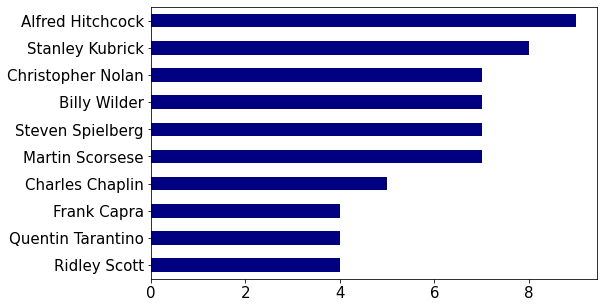

In [9]:
# 10 popular directors (from 155 unique directors)
df['Director'].value_counts()[0:10].plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

# Step 2: data pre-processing

Firstly the data has to be pre-processed using NLP to obtain only one column that contains all the attributes (in words) of each movie. After that, this information is converted into numbers by vectorization, where scores are assigned to each word. Subsequently cosine similarities can be calculated.

### to remove stop words, punctuation, white space, and convert all words to lower case
I used the Rake function to extract the most relevant words from whole sentences in the Plot column. In order to do this, I applied this function to each row under the Plot column and assigned the list of key words to a new column 'Key_words'.

In [10]:
# to remove punctuations from Plot
df['Plot'] = df['Plot'].str.replace('[^\w\s]','')

# # alternative way to remove punctuations, same result
# import string
# df['Plot'] = df['Plot'].str.replace('[{}]'.format(string.punctuation), '')

In [11]:
import nltk

nltk.download('stopwords')

nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# to extract key words from Plot to a list
df['Key_words'] = ''   # initializing a new column
r = Rake()   # use Rake to discard stop words (based on english stopwords from NLTK)

for index, row in df.iterrows():
    r.extract_keywords_from_text(row['Plot'])   # to extract key words from Plot, default in lower case
    key_words_dict_scores = r.get_word_degrees()    # to get dictionary with key words and their scores
    row['Key_words'] = list(key_words_dict_scores.keys())   # to assign list of key words to new column

df

,Title,Director,Actors,Plot,Genre,Key_words
0,The Shawshank Redemption,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,"Crime, Drama","[two, imprisoned, men, bond, number, years, fi..."
1,The Godfather,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"Crime, Drama","[aging, patriarch, organized, crime, dynasty, ..."
2,The Godfather: Part II,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"Crime, Drama","[early, life, career, vito, corleone, 1920s, n..."
3,The Dark Knight,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker emerges fro...,"Action, Crime, Drama","[menace, known, joker, emerges, mysterious, pa..."
4,12 Angry Men,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,"Crime, Drama","[jury, holdout, attempts, prevent, miscarriage..."
...,...,...,...,...,...,...
245,The Lost Weekend,Billy Wilder,"Ray Milland, Jane Wyman, Phillip Terry, Howard...",The desperate life of a chronic alcoholic is f...,"Drama, Film-Noir","[desperate, life, chronic, alcoholic, followed..."
246,Short Term 12,Destin Daniel Cretton,"Brie Larson, John Gallagher Jr., Stephanie Bea...",A 20something supervising staff member of a re...,Drama,"[20something, supervising, staff, member, resi..."
247,His Girl Friday,Howard Hawks,"Cary Grant, Rosalind Russell, Ralph Bellamy, G...",A newspaper editor uses every trick in the boo...,"Comedy, Drama, Romance","[newspaper, editor, uses, every, trick, book, ..."
248,The Straight Story,David Lynch,"Sissy Spacek, Jane Galloway Heitz, Joseph A. C...",An old man makes a long journey by lawnmover t...,"Biography, Drama","[old, man, makes, long, journey, lawnmover, tr..."


In [13]:
# to see last item in Plot
df['Plot'][249]

'A Mumbai teen reflects on his upbringing in the slums when he is accused of cheating on the Indian Version of Who Wants to be a Millionaire'

In [14]:
# to see last dictionary extracted from Plot
key_words_dict_scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'mumbai': 3,
             'teen': 3,
             'reflects': 3,
             'upbringing': 1,
             'slums': 1,
             'accused': 1,
             'cheating': 1,
             'indian': 2,
             'version': 2,
             'wants': 1,
             'millionaire': 1})

In [15]:
# to see last item in Key_words
df['Key_words'][249]

['mumbai',
 'teen',
 'reflects',
 'upbringing',
 'slums',
 'accused',
 'cheating',
 'indian',
 'version',
 'wants',
 'millionaire']

The names of actors and directors are transformed into unique identity values. This is done by merging all first and last names into one word, so that Chris Evans and Chris Hemsworth will appear different. The recommender should detect a similarity only if the person associated to different movies is exactly the same. Every word needs to be converted to lowercase to avoid duplications.

In [16]:
# to extract all genre into a list, only the first three actors into a list, and all directors into a list
df['Genre'] = df['Genre'].map(lambda x: x.split(','))
df['Actors'] = df['Actors'].map(lambda x: x.split(',')[:3])
df['Director'] = df['Director'].map(lambda x: x.split(','))

# create unique identity names by merging first & last name into one word, convert to lowercase 
for index, row in df.iterrows():
    row['Genre'] = [x.lower().replace(' ','') for x in row['Genre']]
    row['Actors'] = [x.lower().replace(' ','') for x in row['Actors']]
    row['Director'] = [x.lower().replace(' ','') for x in row['Director']]
df

,Title,Director,Actors,Plot,Genre,Key_words
0,The Shawshank Redemption,[frankdarabont],"[timrobbins, morganfreeman, bobgunton]",Two imprisoned men bond over a number of years...,"[crime, drama]","[two, imprisoned, men, bond, number, years, fi..."
1,The Godfather,[francisfordcoppola],"[marlonbrando, alpacino, jamescaan]",The aging patriarch of an organized crime dyna...,"[crime, drama]","[aging, patriarch, organized, crime, dynasty, ..."
2,The Godfather: Part II,[francisfordcoppola],"[alpacino, robertduvall, dianekeaton]",The early life and career of Vito Corleone in ...,"[crime, drama]","[early, life, career, vito, corleone, 1920s, n..."
3,The Dark Knight,[christophernolan],"[christianbale, heathledger, aaroneckhart]",When the menace known as the Joker emerges fro...,"[action, crime, drama]","[menace, known, joker, emerges, mysterious, pa..."
4,12 Angry Men,[sidneylumet],"[martinbalsam, johnfiedler, leej.cobb]",A jury holdout attempts to prevent a miscarria...,"[crime, drama]","[jury, holdout, attempts, prevent, miscarriage..."
...,...,...,...,...,...,...
245,The Lost Weekend,[billywilder],"[raymilland, janewyman, phillipterry]",The desperate life of a chronic alcoholic is f...,"[drama, film-noir]","[desperate, life, chronic, alcoholic, followed..."
246,Short Term 12,[destindanielcretton],"[brielarson, johngallagherjr., stephaniebeatriz]",A 20something supervising staff member of a re...,[drama],"[20something, supervising, staff, member, resi..."
247,His Girl Friday,[howardhawks],"[carygrant, rosalindrussell, ralphbellamy]",A newspaper editor uses every trick in the boo...,"[comedy, drama, romance]","[newspaper, editor, uses, every, trick, book, ..."
248,The Straight Story,[davidlynch],"[sissyspacek, janegallowayheitz, josepha.carpe...",An old man makes a long journey by lawnmover t...,"[biography, drama]","[old, man, makes, long, journey, lawnmover, tr..."


# Step 3: create word representation by combining column attributes to Bag_of_words

In [17]:
# to combine 4 lists (4 columns) of key words into 1 sentence under Bag_of_words column
df['Bag_of_words'] = ''
columns = ['Genre', 'Director', 'Actors', 'Key_words']

for index, row in df.iterrows():
    words = ''
    for col in columns:
        words += ' '.join(row[col]) + ' '
    row['Bag_of_words'] = words
    
# strip white spaces infront and behind, replace multiple whitespaces (if any)
df['Bag_of_words'] = df['Bag_of_words'].str.strip().str.replace('   ', ' ').str.replace('  ', ' ')

df = df[['Title','Bag_of_words']]
df

,Title,Bag_of_words
0,The Shawshank Redemption,crime drama frankdarabont timrobbins morganfre...
1,The Godfather,crime drama francisfordcoppola marlonbrando al...
2,The Godfather: Part II,crime drama francisfordcoppola alpacino robert...
3,The Dark Knight,action crime drama christophernolan christianb...
4,12 Angry Men,crime drama sidneylumet martinbalsam johnfiedl...
...,...,...
245,The Lost Weekend,drama film-noir billywilder raymilland janewym...
246,Short Term 12,drama destindanielcretton brielarson johngalla...
247,His Girl Friday,comedy drama romance howardhawks carygrant ros...
248,The Straight Story,biography drama davidlynch sissyspacek janegal...


In [18]:
# an example to see what is in the Bag_of_words
df['Bag_of_words'][0]

'crime drama frankdarabont timrobbins morganfreeman bobgunton two imprisoned men bond number years finding solace eventual redemption acts common decency'

# Step 4: create vector representation for Bag_of_words and the similarity matrix

The recommender model can only read and compare a vector (matrix) with another, so we need to convert the 'Bag_of_words' into vector representation using CountVectorizer, which is a simple frequency counter for each word in the bag_of_words column. Once I have the matrix containing the count for each word, I can apply the cosine_similarity function to compare similarities between movies.

In [19]:
# to generate the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['Bag_of_words'])
count_matrix

<250x3003 sparse matrix of type '<class 'numpy.int64'>'
	with 5295 stored elements in Compressed Sparse Row format>

In [20]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
print(cosine_sim)

[[1.         0.15789474 0.13764944 ... 0.05407381 0.05407381 0.05564149]
 [0.15789474 1.         0.36706517 ... 0.05407381 0.05407381 0.05564149]
 [0.13764944 0.36706517 1.         ... 0.04714045 0.04714045 0.04850713]
 ...
 [0.05407381 0.05407381 0.04714045 ... 1.         0.05555556 0.0571662 ]
 [0.05407381 0.05407381 0.04714045 ... 0.05555556 1.         0.0571662 ]
 [0.05564149 0.05564149 0.04850713 ... 0.0571662  0.0571662  1.        ]]


In [21]:
indices = pd.Series(df['Title'])
indices[:5]

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                12 Angry Men
Name: Title, dtype: object

# Step 5: run and test the recommender model

The final step is to create a function that takes in a movie title as input, and returns the top 10 similar movies. This function will match the input movie title with the corresponding index of the Similarity Matrix, and extract the row of similarity values in descending order. The top 10 similar movies can be found by extracting the top 11 values and subsequently discarding the first index (which is the input movie itself)

In [22]:
# this function takes in a movie title as input and returns the top 10 recommended (similar) movies

def recommend(title, cosine_sim = cosine_sim):
    recommended_movies = []
    idx = indices[indices == title].index[0]   # to get the index of the movie title matching the input movie
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_10_indices = list(score_series.iloc[1:11].index)   # to get the indices of top 10 most similar movies
    # [1:11] to exclude 0 (index 0 is the input movie itself)
    
    for i in top_10_indices:   # to append the titles of top 10 similar movies to the recommended_movies list
        recommended_movies.append(list(df['Title'])[i])
        
    return recommended_movies

recommend('The Dark Knight')

['The Dark Knight Rises',
 'Batman Begins',
 'The Green Mile',
 'Witness for the Prosecution',
 'Out of the Past',
 'Rush',
 'The Prestige',
 'The Godfather',
 'Reservoir Dogs',
 'V for Vendetta']

In [23]:
recommend('Fargo')

['No Country for Old Men',
 'The Departed',
 'Rope',
 'The Godfather',
 'Reservoir Dogs',
 'The Godfather: Part II',
 'On the Waterfront',
 'Goodfellas',
 'Touch of Evil',
 'The Big Lebowski']

In [24]:
recommend('The Avengers')

['Guardians of the Galaxy Vol. 2',
 'Aliens',
 'Guardians of the Galaxy',
 'The Martian',
 'Terminator 2: Judgment Day',
 'The Terminator',
 'The Thing',
 'Interstellar',
 'Spider-Man: Homecoming',
 'The Matrix']

# Conclusion

The model has recommended very similar movies. From my "domain knowledge", I can see some similarities mainly based on directors and plot. I have already watched most of these recommended movies, and am looking forward to watch those few unseen ones.